# Trabajo Práctico N° 2: Redes Neuronales
## Natalia Mellino - Introducción al Aprendizaje Automatizado

In [ ]:
# imports here

import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from copy import deepcopy
import matplotlib.pyplot as plt
import espirales_anidadas
from sklearn.model_selection import train_test_split
import warnings
import pickle
import sys
import ej4tp1

warnings.filterwarnings("ignore")

In [ ]:
#defino parámetros de la red
epocas_por_entrenamiento=25    #numero de epocas que entrena cada vez
eta=0.01              #learning rate
alfa=0.9               #momentum
N2=60                 #neuronas en la capa oculta

#defino MLP para regresión
regr = MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
#defino MLP para clasificación
clasif = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
print(regr)

MLPRegressor(activation='logistic', alpha=0.0, batch_size=1,
             hidden_layer_sizes=(60,), learning_rate_init=0.01, max_iter=25,
             nesterovs_momentum=False, solver='sgd', tol=0.0, warm_start=True)


In [ ]:
# Entrenar red para REGRESION

def entrenar_red_regresion(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    best_red = None
    best_error_test = None
    best_error_train = None
    best_error_val = None
    errores_train = []
    errores_val = []
    errores_test = []
    for i in range(evaluaciones):
        # Entrenamos
        model = red.fit(X_train, y_train)
        # Predecimos
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)
        pred_test = model.predict(X_test)
        # Guardamos error y vemos si la red que tenemos es mejor que la anterior
        current_error_train = sk.metrics.mean_squared_error(y_train, pred_train)
        current_error_val = sk.metrics.mean_squared_error(y_val, pred_val)
        current_error_test = sk.metrics.mean_squared_error(y_test, pred_test)

        if best_error_val is None or current_error_val < best_error_val:
            best_error_val = current_error_val 
            best_error_train = current_error_train
            best_error_test = current_error_test
            best_red = deepcopy(model)
        
        errores_train.append(current_error_train)
        errores_test.append(current_error_test)
        errores_val .append(current_error_val)

    return best_red, errores_train, errores_val, errores_test, best_error_train, best_error_val, best_error_test


In [ ]:
# Entrenar red para CLASIFICACIÓN

def entrenar_red_clasificacion(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    best_red = None
    best_error_test = None
    best_error_train = None
    best_error_val = None
    errores_train = []
    errores_val = []
    errores_test = []
    for i in range(evaluaciones):
        # Entrenamos
        model = red.fit(X_train, y_train)
        # Predecimos
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)
        pred_test = model.predict(X_test)
        # Guardamos error y vemos si la red que tenemos es mejor que la anterior
        current_error_train = sk.metrics.zero_one_loss(y_train, pred_train)
        current_error_val = sk.metrics.zero_one_loss(y_val, pred_val)
        current_error_test = sk.metrics.zero_one_loss(y_test, pred_test)

        if best_error_val is None or current_error_val < best_error_val:
            best_error_val = current_error_val 
            best_error_train = current_error_train
            best_error_test = current_error_test
            best_red = deepcopy(model)
        errores_train.append(current_error_train)
        errores_test.append(current_error_test)
        errores_val .append(current_error_val)

    return best_red, errores_train, errores_val, errores_test, best_error_train, best_error_val, best_error_test

In [ ]:
# Función para graficar errores y predicciones

# regr, e_train, e_val, e_test = entrenar_red_regresion(regr, epocas, X_train, y_train, X_val, y_val, X_test, y_test)

def graficar_errores(e_train, e_val, e_test, epocas):
    plt.plot(range(epocas), e_train, label="train", linestyle=":")
    plt.plot(range(epocas), e_val, label="validacion", linestyle="-.")
    plt.plot(range(epocas), e_test, label="test", linestyle="-")
    plt.legend()
    plt.show()

def graficar_errores_neuronas(e_train, e_val, e_test, nn):
    plt.plot(nn, e_train, label="train", linestyle=":")
    plt.plot(nn, e_val, label="validacion", linestyle="-.")
    plt.plot(nn, e_test, label="test", linestyle="-")
    plt.legend()
    plt.show()

def graficar_predicciones(x, y, colname, title):
    df = pd.DataFrame(x)
    df['Class'] = y
    df.plot(x=0, y=1, kind='scatter', c=colname, colormap='jet', title=title)


## Ejercicio 1

In [ ]:
def ej1():
    train = espirales_anidadas.generate_points_c(600)
    train_data = train.loc[ : , ['x', 'y'] ]
    
    train_target = train.loc[:, 'Class']
    test = espirales_anidadas.generate_points_c(2000)
    X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=0)
    # X_test = test.loc[ : , ['x', 'y'] ]
    # y_test = test.loc[:, 'Class']

    evaluaciones = 1000
    epocas = 20
    eta = 0.1 # lr
    alfa = 0.9 # m

    errores = []

    n_neuronas = [2, 10, 20, 40]

    for nn in n_neuronas:
        r = MLPClassifier(hidden_layer_sizes=(nn,), 
            activation='logistic', 
            solver='sgd', 
            alpha=0.0, 
            batch_size=1, 
            learning_rate='constant', 
            learning_rate_init=eta,
            momentum=alfa,
            nesterovs_momentum=False,
            tol=0.0,
            warm_start=True,
            max_iter=epocas
        )
        red, errores_train, errores_val, errores_test, e_train, e_val, e_test = \
            entrenar_red_clasificacion(r, evaluaciones, X_train, y_train, X_val, y_val, test.loc[ : , ['x', 'y'] ], test.loc[:, 'Class'])
        pickle.dump(red, open(f"ejercicio1/ej1-{nn}.plk", 'wb'))
        errores.append((e_train, e_val, e_test))
        y_pred_test = red.predict(test.loc[ : , ['x', 'y'] ])
        graficar_predicciones(test.loc[ : , ['x', 'y'] ], y_pred_test, 'Class', f"Neuronas {nn}")
    return errores

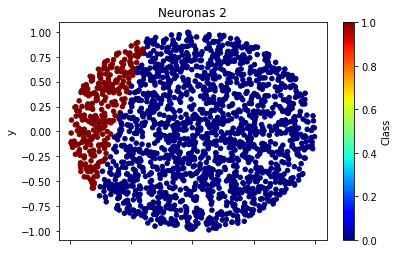

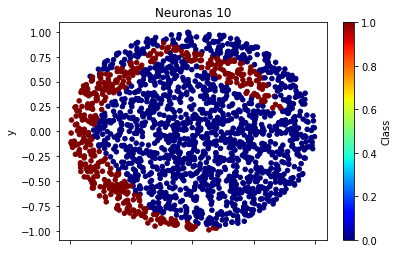

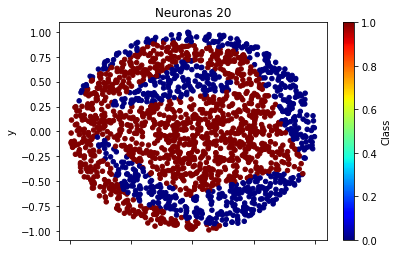

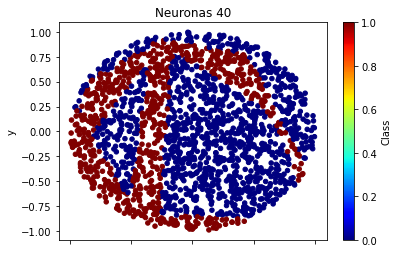

In [ ]:
errores = ej1()    


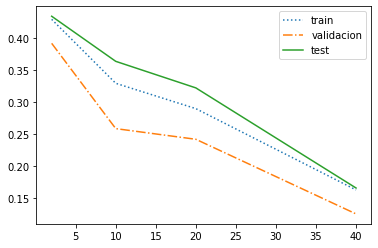

In [ ]:
e_train = []
e_test = []
e_val = []

for error in errores:
    e_train.append(error[0])
    e_val.append(error[1])
    e_test.append(error[2])    
    
graficar_errores_neuronas(e_train, e_val, e_test, [2, 10, 20, 40])



Observaciones:

Si bien realizamos los entrenamientos con distinta cantidad de neuronas en la capa intermedia, luego de correr el bloque de código repetidas veces, no podemos ver ningún caso que se acerque al espiral que se debería de obtener. Recién al tener 40 neuronas si corremos repetidas veces podemos observar alguna que otra vez algo que se parece a una espiral, aunque por lo general se obtienen resultados no muy satisfactorios.

Por otro lado, realizamos la gráfica de los errores con respecto a la cantidad de neuronas y podemos ver allí que los tres errores parecen converger hacia el mismo punto.

## Ejercicio 2

In [ ]:
def ej2():
    patrones = 500 # cantidad de patrones tomada del conjunto de entrenamiento
    patrones_train = 400 # patrones usados para entrenar
    patrones_val = 100 # patrones usados para validar
    patrones_test = 2000 # patrones para testear
    # Leemos los datos del dataframe
    data_cols = ['x', 'y', 'Class']
    data_df = pd.read_csv('dos_elipses.data', names=data_cols)

    # Separamos los datos
    sample_df = data_df.sample(n = patrones)
    X_train, X_val, y_train, y_val = train_test_split(
        sample_df.loc[ : , ['x', 'y'] ], 
        sample_df.loc[ : , ['Class'] ], 
        test_size=((patrones_val * 100) / patrones) / 100, # nos da la proporcion de ejemplos para el conj de validacion 
        random_state=0
    )

    test_cols = ['x', 'y', 'Class']
    test_df = pd.read_csv('dos_elipses.test', names=test_cols)

    neuronas = 6 # cantidad de neuronas en la capa intermedia
    evaluaciones = 300
    epocas = 50

    etas = [0.1, 0.01, 0.001] # valores para learning rate
    alfas = [0, 0.5, 0.9] # valores para momentum

    entrenamientos = 10 # valor promedio que usaremos para el error (ejecuciones)

    # etas = [0.1] # valores para learning rate
    # alfas = [0, 0.5] # valores para momentu
    # entrenamientos = 3

    mean_error_test = []

    best_error = None
    best = None
    best_eta = None
    best_alfa = None
    best_errores = None
    # Para la tabla
    etas2 = []
    alfas2 = []

    for eta in etas:
        for alfa in alfas:
            etas2.append(eta)
            alfas2.append(alfa)
            local_error = []
            # Vamos a guardar la mejor red para eta,alfa de las 10 iteraciones
            best_local_error = None
            best_local = None
            for i in range(0, entrenamientos):
                r = MLPClassifier(hidden_layer_sizes=(neuronas,), 
                    activation='logistic', 
                    solver='sgd', 
                    alpha=0.0, 
                    batch_size=1, 
                    learning_rate='constant', 
                    learning_rate_init=eta,
                    momentum=alfa,
                    nesterovs_momentum=False,
                    tol=0.0,
                    warm_start=True,
                    max_iter=epocas
                )
                red, errores_train, errores_val, errores_test, e_train, e_val, e_test = entrenar_red_clasificacion(
                    r, 
                    evaluaciones,
                    X_train, 
                    y_train, 
                    X_val, 
                    y_val, 
                    test_df.loc[ : , ['x', 'y'] ], 
                    test_df.loc[:, 'Class']
                )

                # Guardamos el valor del error de test en esta iteracion
                local_error.append(e_test)

                # Guardamos la mejor red para el valor dado eta, alfa 
                if best_local_error is None or e_test < best_local_error :
                    best_local_error = e_test
                    best_local = (errores_train, errores_val, errores_test)
                    pickle.dump(red, open(f'ejercicio2/red{eta}-{alfa}.plk', 'wb'))

            # Calculamos el promedio de error de las 10 iteraciones
            current = sum(local_error)/entrenamientos
            mean_error_test.append(current)

            # Si conseguimos un mejor error de test lo guardamos junto con el eta y el alfa
            if best is None or current < best:
                best = current
                best_alfa = alfa
                best_eta = eta
                best_error = best_local
                # Guardamos la mejor red de todos los eta,alfa
                pickle.dump(red, open(f'ejercicio2/bestred.plk', 'wb'))
            

    # Información para la tabla
    info = {'Eta' : etas2, 'Alfa' : alfas2, 'Test Error' : mean_error_test}

    return (info, best_error, best_alfa, best_eta)
     

In [ ]:
info, best_error, best_alfa, best_eta = ej2()

In [ ]:
# Realizamos la tabla con los valores eta, alfa su respectivo error de test.
pd.DataFrame(info)

,Eta,Alfa,Test Error
0,0.100,0.0,0.13230
1,0.100,0.5,0.05350
2,0.100,0.9,0.06345
3,0.010,0.0,0.23840
4,0.010,0.5,0.19475
5,0.010,0.9,0.06900
6,0.001,0.0,0.24350
7,0.001,0.5,0.24350
8,0.001,0.9,0.23360


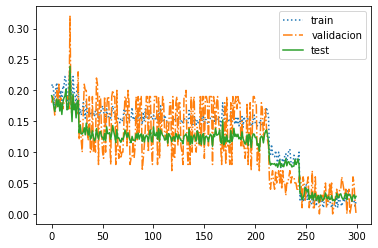

In [ ]:
# Graficamos los errores de nuestro mejor eta-alfa en funcion de la cantidad de evaluaciones
graficar_errores(best_error[0], best_error[1], best_error[2], 300)

Conclusion:

ayuda :(

## Ejercicio 3

In [ ]:
def ej3():
    eta = 0.01 # lr
    alfa = 0.9 # m
    evaluaciones = 400
    epocas = 50
    neuronas = 30
    # Elegimos hacer 5 entrenamientos por cada proporcion
    entrenamientos = 5

    data_cols = ['x', 'y', 'z', 'w', 'u', 'Val']
    train_data = pd.read_csv('ikeda.data', names=data_cols, delim_whitespace=True)
    test_data = (pd.read_csv('ikeda.test', names=data_cols, delim_whitespace=True)).sample(n = 2000)
    best_errores = {}

    test_sizes = [0.05, 0.25, 0.5]
    for size in test_sizes:
        best = None
        X_train, X_val, y_train, y_val = train_test_split(
            train_data.loc[ : , ['x', 'y', 'z', 'w', 'u'] ], 
            train_data.loc[ : , ['Val'] ], 
            test_size=size, # nos da la proporcion de ejemplos para el conj de validacion 
            random_state=0
        )
        for i in range(entrenamientos):
            r = MLPRegressor(hidden_layer_sizes=(neuronas,), 
                    activation='logistic', 
                    solver='sgd', 
                    alpha=0.0, 
                    batch_size=1, 
                    learning_rate='constant', 
                    learning_rate_init=eta,
                    momentum=alfa,
                    nesterovs_momentum=False,
                    tol=0.0,
                    warm_start=True,
                    max_iter=epocas
            )

            red, errores_train, errores_val, errores_test, e_train, e_val, e_test = entrenar_red_regresion(
                r, 
                evaluaciones,
                X_train, 
                y_train, 
                X_val, 
                y_val, 
                test_data.loc[ : , ['x', 'y', 'z', 'w', 'u'] ], 
                test_data.loc[:, 'Val']
            )

            if best is None or e_val < best:
                # Guardamos la mejor red de todos los entrenamientos para la proporcion dada
                pickle.dump(red, open(f'ejercicio3/bestred-{size}.plk', 'wb'))
                best_errores[size] = (errores_train, errores_val, errores_test)
    
    return best_errores        


In [ ]:
errores = ej3()

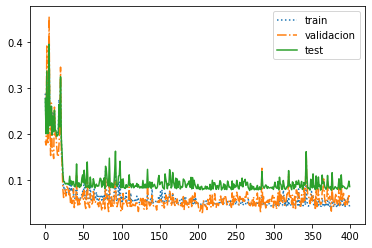

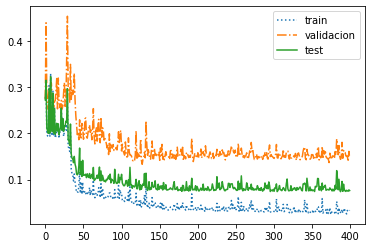

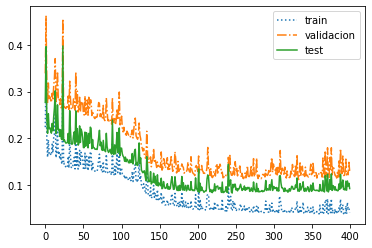

In [ ]:
for size in [0.05, 0.25, 0.5]:
    e_train = errores[size][0]
    e_val = errores[size][1]
    e_test = errores[size][2]
    graficar_errores(e_train, e_val, e_test, 400)

## Ejercicio 4

In [ ]:
def calcular_error(xxs):
    func = lambda x: x**2
    l = []
    for xs in xxs:
        l.append(np.sum(func(xs)))
    return np.sum(np.array(l))

def entrenar_red_regresion_4(red, evaluaciones, X_train, y_train, X_test, y_test):
    # nlayers = red.n_layers
    best_error = None
    best_red = None
    penalty_errors = []
    train_errors = []
    test_errors = []
    for i in range(evaluaciones):
        # Entrenamos
        model = red.fit(X_train, y_train)
        error = calcular_error(model.coefs_)
        penalty_errors.append(error)

        y_train_pred = red.predict(X_train)
        y_test_pred = red.predict(X_test)
        train_errors.append(sk.metrics.mean_squared_error(y_train, y_train_pred))
        test_errors.append(sk.metrics.mean_squared_error(y_test, y_test_pred))

        if best_error is None or error < best_error:
            best_error = error
            best_red = model
    return (best_red, best_error, penalty_errors, train_errors, test_errors)

In [ ]:
def ej4():
    cols = list(range(13))
    train_data = pd.read_csv('ssp.data', names=cols)
    test_data = pd.read_csv('ssp.test', names=cols)
    X_train = train_data.loc[ : , cols[0 : 12]]
    y_train = train_data.loc[ : , [12]]
    X_test = test_data.loc[ : , cols[0 : 12]]
    y_test = test_data.loc[ : , [12]]
    gammas = [10**(-6), 10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1)]

    best_gamma = None
    error = None
    best_errores = None
    best_train_errors = None
    best_test_errors = None
    redes = {}
    for gamma in gammas:
        regr = MLPRegressor(
            hidden_layer_sizes=(6,), 
            activation='logistic', 
            solver='sgd', alpha=gamma, 
            batch_size=1, 
            learning_rate='constant', 
            learning_rate_init=0.05,
            momentum=0.3,
            nesterovs_momentum=False,
            tol=0.0,
            warm_start=True,
            max_iter=20
        )
        red, best_error, errores, train_errors, test_errors = entrenar_red_regresion_4(
            regr, 
            4000, 
            X_train, 
            y_train, 
            test_data.loc[ : , cols[0 : 12]], 
            test_data.loc[ : , [12]]
        )
        if error is None or best_error < error:
            best_gamma = gamma
            error = best_error
            best_errores = errores
            best_train_errors = train_errors
            best_test_errors = test_errors
        redes[gamma] = red
    return (redes, best_gamma, error, best_errores, best_train_errors, best_test_errors)


In [ ]:
redes, gamma, error, errores, train_errors, test_errors = ej4()

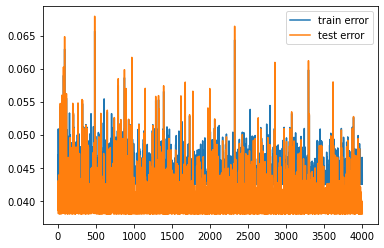

In [ ]:
red = redes[gamma]
evals = list(range(4000))

plt.plot(evals, train_errors, label='train error')
plt.plot(evals, test_errors, label='test error')
plt.legend()
plt.show()


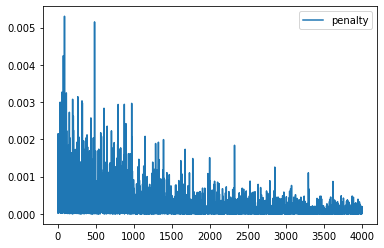

In [ ]:
plt.plot(list(range(4000)), errores, label="penalty", linestyle="-")
plt.legend()
plt.show()

## Ejercicio 5

In [ ]:
# Redefinimos la función de entrenar la red de clasificacion
# para que se adapte al ejercicio

def entrenar_red_clasificacion5(red, evaluaciones, X_train, y_train, X_test, y_test):
    best_red = None
    best_error_test = None
    best_error_train = None
    errores_train = []
    errores_test = []
    for i in range(evaluaciones):
        # Entrenamos
        model = red.fit(X_train, y_train)
        # Predecimos
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        # Guardamos error y vemos si la red que tenemos es mejor que la anterior
        current_error_train = sk.metrics.zero_one_loss(y_train, pred_train)
        current_error_test = sk.metrics.zero_one_loss(y_test, pred_test)

        if best_error_test is None or current_error_test < best_error_test:
            best_error_test = current_error_test 
            best_error_train = current_error_train
            best_red = deepcopy(model)
        errores_train.append(current_error_train)
        errores_test.append(current_error_test)

    return best_red, errores_train, errores_test, best_error_train, best_error_test

In [ ]:
def ej5(eta, alfa, epocas):
    evaluaciones = 300
    # Ahora repetimos el ejercicio pero con redes neuronales
    neuronas = 6
    ds = [2, 4, 6, 8, 16, 32]
    test_errors_diag = []
    test_errors_paral = []
    train_errors_diag = []
    train_errors_paral = []
 
    dd = []
    for d in ds:
        for i in range(0, 20):
            dd.append(d)
            cols = list(map(str, list(range(0, d))))
            # Generamos el conjunto de testeo
            test_diag = ej4tp1.generate_dataframe_a(d = d, n = 10000, C = 0.78)
            test_set_diag = test_diag.loc[ : , cols ]
            y_test_set_diag = test_diag.loc[:, 'Class']

            test_paral = ej4tp1.generate_dataframe_b(d = d, n = 10000, C = 0.78)
            test_set_paral = test_paral.loc[ : , cols ]
            y_test_set_paral = test_paral.loc[:, 'Class']
            # Generamos el conjunto de entrenamiento
            train_set_diag = ej4tp1.generate_dataframe_a(d = d, n = 250, C = 0.78)
            train_set_paral = ej4tp1.generate_dataframe_b(d = d, n = 250, C = 0.78)
            
            Xtrain_diag, ytrain_diag = train_set_diag.loc[ : , cols ], train_set_diag.loc[:, 'Class']
            Xtrain_paral, ytrain_paral = train_set_paral.loc[ : , cols ], train_set_paral.loc[:, 'Class']

            clf = MLPClassifier(
                hidden_layer_sizes=(neuronas,), 
                activation='logistic', 
                solver='sgd', 
                alpha=0.0, 
                batch_size=1, 
                learning_rate='constant', 
                learning_rate_init=eta,
                momentum=alfa,
                nesterovs_momentum=False,
                tol=0.0,
                warm_start=True,
                max_iter=epocas
            )

            r, et, ett, e_train_diag, e_test_diag = entrenar_red_clasificacion5(
                clf, 
                evaluaciones, 
                Xtrain_diag, 
                ytrain_diag, 
                test_set_diag, 
                y_test_set_diag
            )

            r, et, ett, e_train_paral, e_test_paral = entrenar_red_clasificacion5(
                clf, 
                evaluaciones, 
                Xtrain_paral, 
                ytrain_paral, 
                test_set_paral, 
                y_test_set_paral
            )

            # Vamos guardando los errores
            train_errors_diag.append(e_train_diag)
            test_errors_diag.append(e_test_diag)
            train_errors_paral.append(e_train_paral)
            test_errors_paral.append(e_test_paral)

    # Creamos y retornamos el dataframe con los errores listo para plotear
    df_diag = pd.DataFrame({})
    df_diag['d'] = dd
    df_diag['Test Error'] = test_errors_diag
    df_diag['Train Error'] = train_errors_diag

    df_paral = pd.DataFrame({})
    df_paral['d'] = dd
    df_paral['Test Error'] = test_errors_paral
    df_paral['Train Error'] = train_errors_paral

    # Agrupamos y calculamos el promedio de error para cada valor de C
    mean_test_error_diag = df_diag.groupby('d')['Test Error'].mean().to_numpy()
    mean_test_error_paral = df_paral.groupby('d')['Test Error'].mean().to_numpy()
    mean_train_error_diag = df_diag.groupby('d')['Train Error'].mean().to_numpy()
    mean_train_error_paral = df_paral.groupby('d')['Train Error'].mean().to_numpy()
    # Guardamos los resultados obtenidos en los dataframes
    error_df_diag = pd.DataFrame({})
    error_df_diag['d'] = ds
    error_df_diag['Test Error'] = mean_test_error_diag
    error_df_diag['Train Error'] = mean_train_error_diag

    error_df_paral = pd.DataFrame({})
    error_df_paral['d'] = ds
    error_df_paral['Test Error'] = mean_test_error_paral
    error_df_paral['Train Error'] = mean_train_error_paral
    return (error_df_diag, error_df_paral)

In [ ]:
ann_error_diag, ann_error_paral = ej5(0.1, 0.5, 50)

In [ ]:
# Obtenemos los resultados del trabajo de árboles
ad_error_diag, ad_error_paral = ej4tp1.ej4tp1()

# Graficamos todo

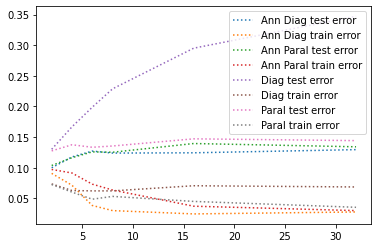

In [ ]:
plt.plot(ann_error_diag['d'], 
    ann_error_diag['Test Error'], 
    label="Ann Diag test error", 
    linestyle=":"
)
plt.plot(ann_error_diag['d'], 
    ann_error_diag['Train Error'], 
    label="Ann Diag train error", 
    linestyle=":"
)
plt.plot(ann_error_paral['d'], 
    ann_error_paral['Test Error'], 
    label="Ann Paral test error", 
    linestyle=":"
)
plt.plot(ann_error_paral['d'], 
    ann_error_paral['Train Error'], 
    label="Ann Paral train error", 
    linestyle=":"
)

plt.plot(ad_error_diag['d'], 
    ad_error_diag['Test Error'], 
    label="Diag test error", 
    linestyle=":"
)
plt.plot(ad_error_diag['d'], 
    ad_error_diag['Train Error'], 
    label="Diag train error", 
    linestyle=":"
)
plt.plot(ad_error_paral['d'], 
    ad_error_paral['Test Error'], 
    label="Paral test error", 
    linestyle=":"
)
plt.plot(ad_error_paral['d'], 
    ad_error_paral['Train Error'], 
    label="Paral train error", 
    linestyle=":"
)
plt.legend()
plt.show()